In [1]:
'''
NEB PLOTTING: Transition state energy

Notes:

(I)
https://www.quantum-espresso.org/Doc/neb_user_guide.pdf
'''
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import numpy as np
import math as mat
import pandas as pd
import scipy
from scipy import signal

In [2]:
# Data gathering

# Importing database
TS = pd.read_csv("./TS.csv")

sizeTS = np.shape(TS)
subSizeTS = (sizeTS[0])/6

In [3]:
# Data processing

# Extracting energy data for each config from the .csv file
TSenergy = TS.iloc[:,2]# Normalization (ref: IS energy)
TSenergySplit = np.split(TSenergy, subSizeTS) # Splitting the energy data
n = len(TSenergySplit) # Because it's heavily reused
TSenergyConfig = [np.array(TSenergySplit[i]) for i in range(0,n)] # Converting splitted column into list of arrays

# Extracting title string
TStitle = TS.iloc[:,0]
TStitleReady = [np.array(TStitle[k]) for k in range(0,len(TStitle),6)]

# Normalization (Reference: IS energy)
TSenergyConfigNorm = [TSenergyConfig[i]-TSenergyConfig[i][0] for i in range(0,n)] 

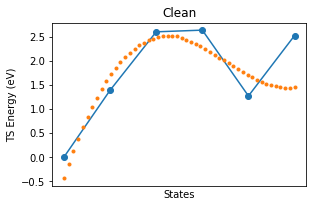

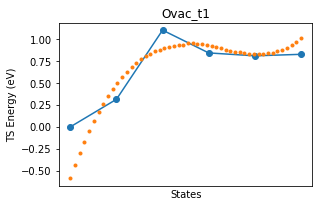

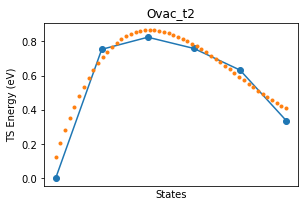

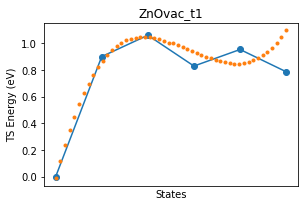

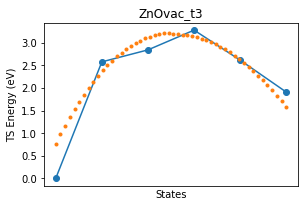

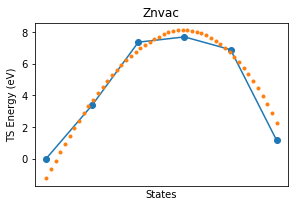

In [13]:
# Data representation

for i in range(0,n):
    # Variables
    x = np.array(range(0,len(TSenergyConfigNorm[i])))
    y = np.array(TSenergyConfigNorm[i])
    plotTitle = np.array(TStitleReady[i])
    
    # Polynomial approachxp = np.linspace(0, 5)
    z = np.polyfit(x, y, 5)
    p = np.poly1d(z)
    
    # Savitzky-Golay Filter
    xp = np.linspace(0, 5)
    ySG = signal.savgol_filter(p(xp), 49, 3)
    #intySG = int(ySG)
    
    # Plotting
    f = plt.figure(figsize=(10,3))
    ax = f.add_subplot(121)
    '''
    print('xp = ', xp)
    print('ySG = ', ySG)
    print('z = ', z)
    print('p(xp) = ', p(xp))
    '''
    ax.plot(x, y, 'o-')
    #ax.plot(xp, p(xp), '-')
    #ax.plot(xp, ySG, '.')
    plt.xticks([])
    plt.xlabel('States')
    plt.ylabel('TS Energy (eV)')
    plt.title(str(plotTitle))
    plt.show()